In [3]:
import lattice
#%matplotlib widget
import xrayutilities as xu
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Generate new colormap for RSM display
rainbow = cm.get_cmap('rainbow', 256)
newcolors = rainbow(np.linspace(0, 1, 256))
white = np.array([1, 1, 1, 1])
newcolors[:20, :] = white
newcmp = ListedColormap(newcolors)

refHKL1 = (3, 1, 0)
iHKL1 = (0,0,1)
oHKL1 = (3, 1, 0)
subMat1 = 'LAO'

refHKL2 = (3, 1, 1)
iHKL2 = (0,0,1)
oHKL2 = (3, 1, 0)
subMat2 = 'LAO'

map1 = r'C:\Users\olive\OneDrive - UNSW\Experiments 2019\Xrays\P0114SA\P0114SA_RSM_310_phi90.ras'
map2 = r'C:\Users\olive\OneDrive - UNSW\Experiments 2019\Xrays\P0114SA\P0114SA_RSM_311_phi0.ras'

rsm1 = lattice.lattice(refHKL1, iHKL1, oHKL1, subMat1, geometry = 'hi_lo')#, filepath = map1)
rsm2 = lattice.lattice(refHKL2, iHKL2, oHKL2, subMat2, geometry = 'hi_lo')#, filepath = map2)

rsm1.load_sub( filepath = map1 )
rsm2.load_sub( filepath = map2 )

g = xu.Gridder2D(300,101)
g.KeepData(True)               # I think this bad boy allows me to load multiple datasets into gridder
g.dataRange(-0.3, 2, 4, 5.4)  # Set data range before loading data

g(rsm1.qy, rsm1.qz, rsm1.data)
#griddata = g.data

g(rsm2.qy, rsm2.qz, rsm2.data)
#griddata = g.data

xaxis, yaxis = np.meshgrid(g.xaxis, g.yaxis)
print(np.shape(xaxis))
print(np.shape(yaxis))
print(np.shape(g.data))

%matplotlib widget

#Plot data
fig, (ax1, ax2) = plt.subplots(1, 2, facecolor='w')
fig.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.5, wspace=0.2, hspace=0.2)

ax1.contourf(xaxis, yaxis, np.log( np.transpose(g.data) ), 50, cmap=newcmp)
ax1.set_xlim(-0.25, 0.25)
ax2.contourf(xaxis, yaxis, np.transpose(g.data), 50, cmap=newcmp)
ax2.set_xlim(1.4, 1.9)

ax1.set_ylabel(r'$Q_{[310]}$ ($\mathrm{\AA^{-1}}$)', fontsize='x-large')
ax1.set_xlabel(r'$Q_{[001]}$ ($\mathrm{\AA^{-1}}$)', fontsize='x-large')
ax2.set_ylabel(r'$Q_{[310]}$ ($\mathrm{\AA^{-1}}$)', fontsize='x-large')
ax2.set_xlabel(r'$Q_{[001]}$ ($\mathrm{\AA^{-1}}$)', fontsize='x-large')

ax1.yaxis.set_ticks(np.arange(4, 5.4, 0.4))
ax2.yaxis.set_ticks(np.arange(4, 5.4, 0.4))

'''
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax1.tick_params(labelright='off')
ax2.yaxis.tick_right()

d = .02 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d), (-d,+d), **kwargs)
ax1.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)
'''
#, position=(-0,0), fontsize='large')

experimental omega = 49.4886
experimental tt = 79.99
theoretical omega = 40.04617334442352
theoretical 2theta = 80.09234498129976
XU.analysis.fit_bragg_peak:fitted peak angles: 
	om = 49.4921
	tt = 80.0026
delta = (9.445957140762545, -0.0897528670475225)
experimental omega = 69.5505
experimental tt = 84.74
theoretical omega = 59.98768699308125
theoretical 2theta = 84.8785727585779
XU.analysis.fit_bragg_peak:fitted peak angles: 
	om = 69.5504
	tt = 84.7282
delta = (9.562694028408309, -0.15040142052534122)
(101, 300)
(101, 300)
(300, 101)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

"\nax1.spines['right'].set_visible(False)\nax2.spines['left'].set_visible(False)\nax1.yaxis.tick_left()\nax1.tick_params(labelright='off')\nax2.yaxis.tick_right()\n\nd = .02 # how big to make the diagonal lines in axes coordinates\n# arguments to pass plot, just so we don't keep repeating them\nkwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)\nax1.plot((1-d,1+d), (-d,+d), **kwargs)\nax1.plot((1-d,1+d),(1-d,1+d), **kwargs)\n\nkwargs.update(transform=ax2.transAxes)  # switch to the bottom axes\nax2.plot((-d,+d), (1-d,1+d), **kwargs)\nax2.plot((-d,+d), (-d,+d), **kwargs)\n"

In [57]:
# Attempt 1 - put Qy Qz and intensity data from both maps into a single array and plot it
#Issues: amending the array gives 2 elements that are data from each file, and adding individually make shte array 1D because
#both 2D arrays are different sizes

import numpy as np
from matplotlib import pyplot as plt

Qy = []
#Qy.append( rsm1.qy )
#Qy.append( rsm2.qy )
for i in range(0, len(rsm1.qy)):
    Qy.append(rsm1.qy[i])
for i in range(0, len(rsm2.qy)):
    Qy.append(rsm2.qy[i])

Qz = []
#Qz.append( rsm1.qz )
#Qz.append( rsm2.qz )
for i in range(0, len(rsm1.qz)):
    Qz.append(rsm1.qz[i])
for i in range(0, len(rsm2.qz)):
    Qz.append(rsm2.qz[i])

psd = []
#psd.append( rsm1.data )
#psd.append( rsm2.data )
for i in range(0, len(rsm1.qy)):
    psd.append(rsm1.data[i])
for i in range(0, len(rsm2.qy)):
    psd.append(rsm2.data[i])
    
print('RSM 1 Qy = ' + str(np.shape(rsm1.qy)))
print('RSM 1 Qz = ' + str(np.shape(rsm1.qz)))
print('RSM 1 data = ' + str(np.shape(rsm1.data)))
print('RSM 2 Qy = ' + str(np.shape(rsm2.qy)))
print('RSM 2 Qz = ' + str(np.shape(rsm2.qz)))
print('RSM 2 data = ' + str(np.shape(rsm2.data)))
print('Qy = ' + str(np.shape(Qy)))
print('Qz = ' + str(np.shape(Qz)))
print('psd = ' + str(np.shape(psd)))

#gridder = xu.Gridder2D( 100, 100 )
#gridder([rsm1.qy, rsm2.qy], [rsm1.qz, rsm2.qz], [rsm1.data, rsm2.data])
#data = xu.maplog( gridder.data, 4, 1)

#fig, ax = plt.subplot()

#ax.contourf(gridder.xaxis, gridder.yaxis, np.transpose(data) )
#ax.colorbar(label='Data')
#ax.set_aspect('equal')
#ax.set_xlabel(r'$Q_{[' + str(self.iHKL[0]) + '' + str(self.iHKL[1]) + '' + str(self.iHKL[2]) + ']}$', fontsize=18)
#ax.set_ylabel(r'$Q_{[' + str(self.oHKL[0]) + '' + str(self.oHKL[1]) + '' + str(self.oHKL[2]) + ']}$', fontsize=18)
#ax.tick_params(axis='both', which='major', labelsize=18)

RSM 1 Qy = (717, 201)
RSM 1 Qz = (717, 201)
RSM 1 data = (717, 201)
RSM 2 Qy = (382, 165)
RSM 2 Qz = (382, 165)
RSM 2 data = (382, 165)
Qy = (1099,)
Qz = (1099,)
psd = (1099,)


(101, 300)
(101, 300)
(300, 101)


Text(0, 0.5, '$Q_{[310]}$ ($\\mathrm{\\AA^{-1}}$)')

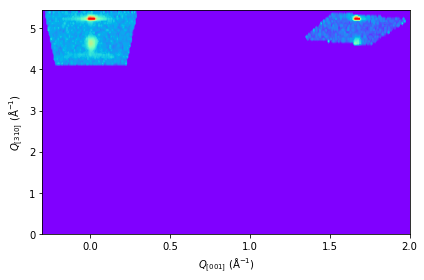

In [44]:
#Attempt 2 - Use properties of gridder2D to load consecutive datasets together

g = xu.Gridder2D(300,101)
g.KeepData(True)               # I think this bad boy allows me to load multiple datasets into gridder
g.dataRange(-0.3, 2, 0, 5.45)  # Set data range before loading data

g(rsm1.qy, rsm1.qz, rsm1.data)
#griddata = g.data

g(rsm2.qy, rsm2.qz, rsm2.data)
#griddata = g.data

xaxis, yaxis = np.meshgrid(g.xaxis, g.yaxis)
print(np.shape(xaxis))
print(np.shape(yaxis))
print(np.shape(g.data))

plt.figure()
data = xu.maplog(g.data, 4.3, 2)
cf = plt.contourf(xaxis, yaxis, np.transpose(data), 100, extend='min', cmap='rainbow')
plt.xlabel(r'$Q_{[001]}$ ($\mathrm{\AA^{-1}}$)')
plt.ylabel(r'$Q_{[310]}$ ($\mathrm{\AA^{-1}}$)')


C:\Users\olive\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0.5, 0, '$Q_{[001]}$ ($\\mathrm{\\AA^{-1}}$)')

C:\Users\olive\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


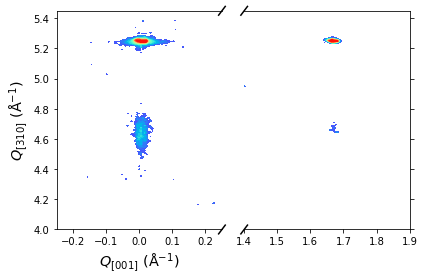

In [4]:
#Attempt 3 - Here I want to plot both RSMs (like in Attempt 2) but to have a broken x-axis between (310) and (311) peaks
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import numpy as np

# Generate new colormap for RSM display
rainbow = cm.get_cmap('rainbow', 256)
newcolors = rainbow(np.linspace(0, 1, 256))
white = np.array([1, 1, 1, 1])
newcolors[:20, :] = white
newcmp = ListedColormap(newcolors)




#Initialise gridder and set ranges
g = xu.Gridder2D(400,201)
g.KeepData(True)               # I think this bad boy allows me to load multiple datasets into gridder
g.dataRange(-0.3, 2, 4, 5.45)  # Set data range before loading data

#import first dataset to gridder
g(rsm1.qy, rsm1.qz, rsm1.data)
g(rsm2.qy, rsm2.qz, rsm2.data)

xaxis, yaxis = np.meshgrid(g.xaxis, g.yaxis)
data = xu.maplog(g.data, 4.1, 2.0)


#%matplotlib widget

#Plot data
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w')
fig.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.5, wspace=0.2, hspace=0.2)

ax1.contourf(xaxis, yaxis, np.transpose(data), 20, cmap=newcmp)
ax1.set_xlim(-0.25, 0.25)
ax2.contourf(xaxis, yaxis, np.transpose(data), 20, cmap=newcmp)
ax2.set_xlim(1.4, 1.9)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax1.tick_params(labelright='off')
ax2.yaxis.tick_right()

d = .02 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d), (-d,+d), **kwargs)
ax1.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax1.set_ylabel(r'$Q_{[310]}$ ($\mathrm{\AA^{-1}}$)', fontsize='x-large')
ax1.set_xlabel(r'$Q_{[001]}$ ($\mathrm{\AA^{-1}}$)', fontsize='x-large')#, position=(-0,0), fontsize='large')




In [131]:
import xrayutilities as xu # import Python package
g = xu.Gridder2D(100, 101) # initialize the Gridder object
g.KeepData(True)
g.dataRange(1, 2, 3, 4)  # (xgrd_min, xgrd_max, ygrd_min, ygrd_max)
#====== load some data here =====
g(x, y, data) # call the gridder with the data
griddata = g.data # the data attribute contains the so far gridded data.

#====== load some more data here =====
g(x, y, data) # call the gridder with the new data
griddata = g.data # the data attribute contains the combined gridded data.

NameError: name 'x' is not defined

[array([[-0.21419198, -0.21202389, -0.20985574, ...,  0.2154653 ,
          0.2176333 ,  0.21980124],
        [-0.21428704, -0.21211798, -0.20994888, ...,  0.21556093,
          0.21772989,  0.21989878],
        [-0.21438208, -0.21221207, -0.210042  , ...,  0.21565654,
          0.21782646,  0.21999632],
        ...,
        [-0.27794428, -0.27513088, -0.27231741, ...,  0.27959661,
          0.28240988,  0.28522309],
        [-0.27802726, -0.27521302, -0.27239871, ...,  0.27968008,
          0.2824942 ,  0.28530824],
        [-0.27811023, -0.27529514, -0.27247999, ...,  0.27976353,
          0.28257849,  0.28539338]]),
 array([[1.34871663, 1.35120618, 1.35369536, ..., 1.74672157, 1.74914229,
         1.75156253],
        [1.34918051, 1.35167092, 1.35416095, ..., 1.74732234, 1.74974389,
         1.75216496],
        [1.34964429, 1.35213556, 1.35462645, ..., 1.74792299, 1.75034537,
         1.75276727],
        ...,
        [1.51762222, 1.52042355, 1.52322446, ..., 1.96547103, 1.96819491

In [ ]:
def plotQ(self, xGrid, yGrid, dynLow, dynHigh, ax=None, **kwargs):
        if ax is None:
            fig, ax = plt.subplots()
        #ax.set_title( self.filename )
        
        
        self.gridder = xu.Gridder2D(xGrid,yGrid)
        self.gridder(self.qy, self.qz, self.data)
        intHigh = np.argmax(self.data)
        intMin = np.argmin(self.data)
        dynhigh = np.rint(np.log10(intHigh))
        #print('intMin = ' + str(intMin))
        #print('intHigh = ' + str(intHigh))
        INT = xu.maplog(self.gridder.data, dynLow, dynHigh)

        ax.contourf(self.gridder.xaxis, self.gridder.yaxis, np.transpose(INT),  **kwargs)
        #ax.colorbar(label='Data')
        #ax.set_aspect('equal')
        ax.set_xlabel(r'$Q_{[' + str(self.iHKL[0]) + '' + str(self.iHKL[1]) + '' + str(self.iHKL[2]) + ']}$', fontsize=18)
        ax.set_ylabel(r'$Q_{[' + str(self.oHKL[0]) + '' + str(self.oHKL[1]) + '' + str(self.oHKL[2]) + ']}$', fontsize=18)
        ax.tick_params(axis='both', which='major', labelsize=18)
        
        return ax